# Deep Learning

Regression

In [54]:
import pandas as pd

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('insurance.csv') #load the dataset
print(df.shape)
df.head(3)

(1338, 7)


age  sex    bmi  children  smoker     region     charges
0   19    1  27.90         0       1  southwest  16884.9240
1   18    0  33.77         1       0  southeast   1725.5523
2   28    0  33.00         3       0  southeast   4449.4620

In [32]:
# inspect categorical features
df.region.unique()

array(['southwest', 'southeast', '0rthwest', '0rtheast'], dtype=object)

In [33]:
# clean categorical features
df.region = df.region.replace('0', 'no', regex=True)
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
# Define X and y
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [35]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X) 
X.head(2)

age  sex    bmi  children  smoker  region_northeast  region_northwest  \
0   19    1  27.90         0       1                 0                 0   
1   18    0  33.77         1       0                 0                 0   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0

In [36]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Function For Designing Model
Function that creates and returns your Keras sequential model (To use in skires wrappers)

In [38]:
def design_model(features):
  # ann model instance  
  model_regr = Sequential()
  
  
  #### INPUT LAYER>>>>
  #adding the input layer
  model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


  #### HIDDEN LAYER1>>>>
  # there are a numbers of activation functions such as softmax, sigmoid, 
  # but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
  model_regr.add(Dense(128, activation = 'relu'))


  #### OUTPUT LAYER>>>>
  model_regr.add(Dense(1, activation = 'linear'))  


  #### Optimizer
  # WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
  # right now adam is the best one as its solved previous optmizers issues.
  opt = Adam(learning_rate = 0.01)
  # loss/cost 
  # MSE, MAE, Huber loss  
  model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  
    

  return model_regr

# GridSearchCV

In [47]:
model = KerasRegressor(model = model_regr)

In [49]:
# This is computational extensive, we will use small value here
param_grid = dict(epochs = [50,100],
                  batch_size = [1,10,50])

In [58]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=-1, # use all processor cores of our machine (faster!!)
                    scoring = 'r2',
                    return_train_score = True,
                    cv=3)

grid_result = grid.fit(x_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp35mgvo3u\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpws926myf\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpx1vdj3_u\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp4ixs9efr\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmps3m4sq29\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmphxxthjkb\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp5y81y7ie\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpf535ijfd\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpg7dc7jzm\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpgge44wz2\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpvon3jjxu\assets
INFO:tensorflow:Assets written to: C:\Users

21/21 [==============================] - 0s 950us/step - loss: 20425004.0000 - mae: 2614.6938
Epoch 48/50
21/21 [==============================] - 0s 1ms/step - loss: 21148274.0000 - mae: 2890.3711
Epoch 49/50
21/21 [==============================] - 0s 950us/step - loss: 20627218.0000 - mae: 2502.1807
Epoch 50/50
21/21 [==============================] - 0s 1ms/step - loss: 20389002.0000 - mae: 2658.7461


In [59]:
grid_result.best_score_ , grid_result.best_params_

(0.8364351104755063, {'batch_size': 50, 'epochs': 50})

# Normal Design Model
Invoke The Function For Our Model Design

In [60]:
model_regr = design_model(x_train)

#### Training Phase

In [61]:
# reference https://keras.io/api/callbacks/early_stopping/
# add early stoping when theres no improvement
stop = EarlyStopping(monitor='val_loss', 
                     mode='min', 
                     patience=30,
                     verbose=1)

In [62]:
# create a variable to store our fitted model
h = model_regr.fit(x_train, y_train, 
               validation_split=0.2, 
               epochs=50, 
               batch_size=50,
               verbose=1,
               callbacks=[stop])

Epoch 1/50
17/17 [==============================] - 0s 8ms/step - loss: 322632000.0000 - mae: 13396.2461 - val_loss: 313966016.0000 - val_mae: 12718.6826
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 321403712.0000 - mae: 13357.3779 - val_loss: 311487136.0000 - val_mae: 12641.5312
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 316875904.0000 - mae: 13221.4590 - val_loss: 303833216.0000 - val_mae: 12414.2363
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 304344800.0000 - mae: 12857.4287 - val_loss: 286070976.0000 - val_mae: 11894.6426
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 279039328.0000 - mae: 12132.4229 - val_loss: 254124864.0000 - val_mae: 10940.4648
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 237672560.0000 - mae: 10873.5674 - val_loss: 206250672.0000 - val_mae: 9449.9893
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 18202

#### Model Summary

In [63]:
# check layer
# model_regr.layers
# view summary
model_regr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 90        
                                                                 
 dense_7 (Dense)             (None, 128)               1280      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


In [64]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0, 0.5, 'MAE')

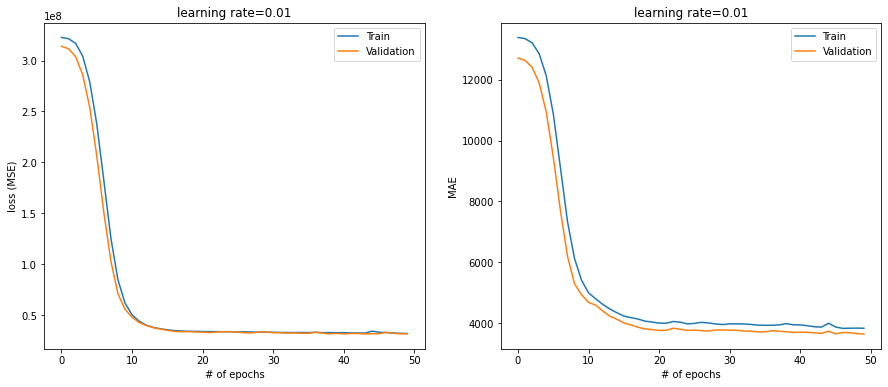

In [65]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

#### Evaluation

In [66]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

11/11 [==============================] - 0s 1ms/step - loss: 31650346.0000 - mae: 3928.0566


### Summary


1. Preparing the data for learning:
2. separating features from labels using array slicing
3. determining the shape of your data
4. preprocessing the categorical variables using one-hot encoding
5. splitting the data into training and test sets
6. scaling the numerical features
7. Designing a Sequential model by chaining InputLayer() and the tf.keras.layers.Dense layers. InputLayer() was used as a placeholder for the input data. The output layer in this case needed one neuron since we need a prediction of a single value in the regression. And finally, hidden layers were added with the relu activation function to handle complex dependencies in the data.
8. Choosing an optimizer using keras.optimizers with a specific learning rate hyperparameter.
9. Training the model - using model.fit() to train the model on the training data and training labels.
10. Setting the values for the learning hyperparameters: number of epochs and batch sizes.
11. Evaluating the model using model.evaluate() on the test data.
